In [56]:
# 1- Importar librerías
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

import warnings
warnings.filterwarnings('ignore')


#creamos la red
model = Sequential([
    
    #Create Convolution2d Layer with activation Relu
    Conv2D(32,(3,3),input_shape=(64,64,3)),
    Activation('relu'),
    #Create MaxsPooling2D Function 
    MaxPooling2D(pool_size=(2,2)),
    
    #Create Convolution 2d Layer again 
    Conv2D(32,(3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    #Flatten layer !
    Flatten(),
    
 
    #Full connection
    Dense(units=128),
    Activation('relu'),
    
    
    Dense(units=1),
    Activation('sigmoid'),
       
])



# For a binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#We will use ImageDataGenerator for generating data from the image set.
#We already know that small the size of computational data, faster is the processing of neural network.
#So we will scale the image by factor of 1/255 to bring all the RGB values in range [0,1].
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('cat-and-dog/training_set/training_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('cat-and-dog/test_set/test_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
__________

In [54]:
history=model.fit_generator(training_set,
                   samples_per_epoch=8000,
                   nb_epoch=20,
                   validation_data=test_set,
                   nb_val_samples=50)

Epoch 1/20
250/250 [==============================] - 46s 185ms/step - loss: 0.4130 - acc: 0.8125 - val_loss: 0.4892 - val_acc: 0.7727
Epoch 2/20
250/250 [==============================] - 45s 180ms/step - loss: 0.3945 - acc: 0.8186 - val_loss: 0.4532 - val_acc: 0.7917
Epoch 3/20
250/250 [==============================] - 46s 183ms/step - loss: 0.3847 - acc: 0.8242 - val_loss: 0.4495 - val_acc: 0.8051
Epoch 4/20
250/250 [==============================] - 45s 180ms/step - loss: 0.3775 - acc: 0.8280 - val_loss: 0.4765 - val_acc: 0.7987
Epoch 5/20
250/250 [==============================] - 46s 184ms/step - loss: 0.3759 - acc: 0.8282 - val_loss: 0.4623 - val_acc: 0.7994
Epoch 6/20
250/250 [==============================] - 46s 183ms/step - loss: 0.3500 - acc: 0.8447 - val_loss: 0.4770 - val_acc: 0.7790
Epoch 7/20
250/250 [==============================] - 46s 183ms/step - loss: 0.3485 - acc: 0.8465 - val_loss: 0.4642 - val_acc: 0.8057
Epoch 8/20
250/250 [==============================] - 4

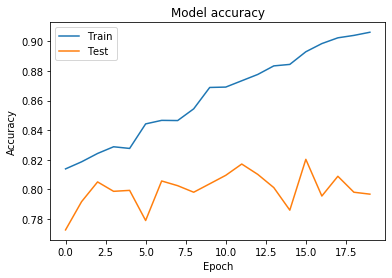

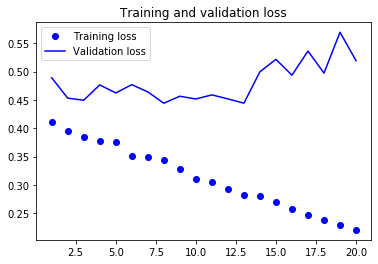

acc 86.32509720362101 % val_acc 80.00342262321048 %


In [55]:
#Dibujar resultados

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#RESULTADO
print('acc',sum(acc)/len(acc)*100,'%','val_acc',sum(val_acc)/len(val_acc)*100,'%')


Creo que la imagen 4007 es un PERRO (DOG)


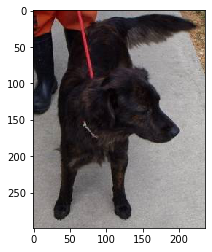

In [32]:
import numpy as np
from keras.preprocessing import image


test_image=image.load_img('cat-and-dog/test_set/test_set/dogs/dog.4007.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict_classes(test_image)


if result[0][0] >=0.5:
    prediction='Creo que la imagen 4007 es un PERRO (DOG)'
else:
    prediction='Creo que la imagen 4007 es un GATO (CAT)'
print(prediction)



fotodog4007="cat-and-dog/test_set/test_set/dogs/dog.4007.jpg"
plt.imshow(plt.imread(fotodog4007))


In [33]:
# save transfer learning model for offline prediction purposes
model.save('dogsandcat_.h5') #genera el archivo en el directorio